<h1 align=center> INFO 7390 Assignment - Team Mavericks</h1>

#                                      K-Means Clustering 

K-means clustering is a type of unsupervised learning, which is used for unlabeled data or data without defined categories or groups. The main purpose of this algorithm is to find groups in the data by grouping similar data based on their underlying structure into clusters. The number of groups represented by the variable K.

## Steps:

1. Choose the number of clusters(K)
2. Select k random points from the data as centroids c_1, c_2, ..... c_k  
3. For each data point x_i, assign the point to the nearest centroid(c_1, c_2 .. c_k) 
4. For each cluster k_i, recompute centroid. (New centroid = mean of all points assigned to that cluster)
5. Repeat steps 3 and 4 until stopping criteria is met

Stopping criteria: 
1. Centroids of newly formed clusters do not change 
2. Points remain in the same cluster 
3. Maximum number of iterations is reached

## Basic Python implementation of K-Means algorithm:

Importing necessary packages:

In [1]:
import pandas as pd
import numpy as np

Now let's define a sample numpy array :

In [2]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

We can view the number of rows and columns in the numpy array:

In [3]:
np.shape(X)

(11, 2)

Now, let's go ahead and build functions to implement the following steps:
1. Initialize random centroids
2. Find the nearest centroid for each datapoint and assign it to that cluster
3. Recompute the centroids for each of the clusters

In [4]:
 class Kmeans:
    
    # function for initializing the number of iterations and random state
    def __init__(self, n_clusters, max_iter=5,random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    # function for finding the initial centroids ( centroid values are returned)
    def initialize_random_centroids(self, X):
        initial_centroids=[]
        np.random.seed(self.random_state)
        initial_centroids_indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        initial_centroids.append(X[initial_centroids_indices])
        print("The initial random centroids :",initial_centroids)
        return initial_centroids

    # function for finding the nearest centroid (cluster labels are returned)
    def nearest_centroid(self,X,centroids):
        distance = np.zeros((X.shape[0], 2))
        nearest_cluster=[]
        for i in range(X.shape[0]):
            print("X",i,"=",X[i])
            for k in range(self.n_clusters):
                min_dist =np.sqrt(((X[i] - centroids[0][k])**2).sum())
                distance[:,k]= min_dist
            print("distance_from centroid ",0,"=",distance[k][0])
            print("distance_from centroid ",1,"=",distance[k][1])
            print("Nearest cluster= ",np.argmin(distance))
            nearest_cluster.append(np.argmin(distance))
        return nearest_cluster
    
    
    # function for computing the centroids (centroid values are returned)
    def recompute_centroids(self, X,labels):
        indices = [[i for i, l in enumerate(labels) if l == j]
                    for j in range(self.n_clusters)]
        X_by_cluster = [X[i] for i in indices]
        # update the clusters
        cluster_centers=[]
        cluster_centers.append([c.sum(axis=0) / len(c) for c in X_by_cluster])
        return cluster_centers
    
    def fit(self, X):
        self.centroids = self.initialize_random_centroids(X)
        for i in range(self.max_iter):
            print("\n\nIteration:",i)
            old_centroids = self.centroids
            self.labels = self.nearest_centroid(X,old_centroids)
            self.centroids = self.recompute_centroids(X,self.labels)
            print("\nOld centroids",old_centroids)
            print("New centroids",self.centroids)
            if np.allclose(old_centroids,self.centroids):
                break
        
def main():
    r= Kmeans(2)
    r.fit(X)
        
if __name__ == "__main__":
    main()

The initial random centroids : [array([[1. , 2. ],
       [1. , 0.6]])]


Iteration: 0
X 0 = [1. 2.]
distance_from centroid  0 = 0.0
distance_from centroid  1 = 1.4
Nearest cluster=  0
X 1 = [1.5 1.8]
distance_from centroid  0 = 0.5385164807134504
distance_from centroid  1 = 1.3
Nearest cluster=  0
X 2 = [5. 8.]
distance_from centroid  0 = 7.211102550927978
distance_from centroid  1 = 8.411896337925237
Nearest cluster=  0
X 3 = [8. 8.]
distance_from centroid  0 = 9.219544457292887
distance_from centroid  1 = 10.186265262597475
Nearest cluster=  0
X 4 = [1.  0.6]
distance_from centroid  0 = 1.4
distance_from centroid  1 = 0.0
Nearest cluster=  1
X 5 = [ 9. 11.]
distance_from centroid  0 = 12.041594578792296
distance_from centroid  1 = 13.120975573485381
Nearest cluster=  0
X 6 = [1. 3.]
distance_from centroid  0 = 1.0
distance_from centroid  1 = 2.4
Nearest cluster=  0
X 7 = [8. 9.]
distance_from centroid  0 = 9.899494936611665
distance_from centroid  1 = 10.934349546269317
Nearest clus

From the above implementation, we can see that the numpy array we have given as input, contains 11 rows and 2 columns.

1. def _init_ : Here, the number of clusters is passed to the function, and we define the maximum iterations and the random state.

2. def initialize_random_centroids :Permutation of those 11 datapoints are done and number of datapoints equivalent to the number of clusters provided are selected randomly. Here, the datapoints [1,2] and [1,0.6] are selected as initial centroids randomly.

3. def nearest_centroids : In this step, the Euclidean distance of a datapoint to each of the centroids is calculated and the centroid with the minimum distance is determined. This is done for all the datapoints in the array.

4. def recompute_centroids : Here, the datapoints are grouped into clusters based on the nearest centroid found out in the previous step. For each cluster, mean is calculated and that is the new centroid of that cluster.

The above steps are repeated for the number of iterations we have provided. When there is no change in the centroids or when  the maximum iteration is reached, the stopping criteria occurs and we get the datapoints grouped into final clusters.


## Comparison of both implementation methods:

### K-Means implementation WITH inbuilt functions:

In [5]:
# Loading necessary packages
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [62]:
#Loading the dataset(Original Data Source Link : https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)
filename1 = "C://Users/roopa/Documents/Wholesale customers data.csv"
customer_df = pd.read_csv(filename1,delimiter = ',', header = 0)

In [7]:
# Viewing the data
customer_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [8]:
# Finding the dimensions
customer_df.shape

(440, 8)

In [9]:
# Finding out additional information regarding the dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
# Finding the statistical measures
customer_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
# Total number of duplicates in the dataframe
customer_df.duplicated().sum()

0

In [12]:
#Unique values in the dataframe
customer_df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [13]:
#Finding the number of null values
customer_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

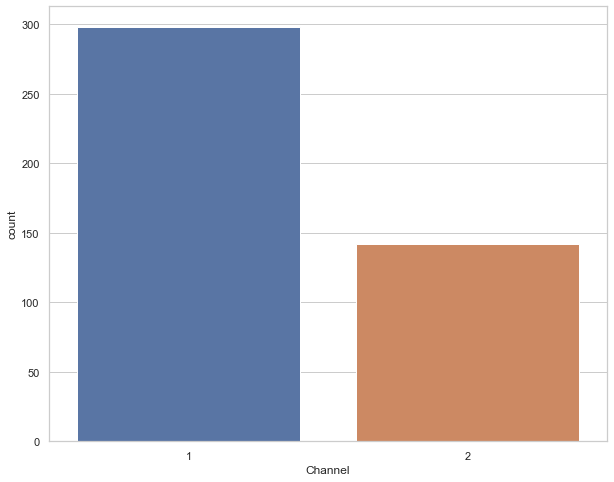

In [78]:
plt.figure(figsize = (10,8))
sns.countplot(x="Channel", data=customer_df)

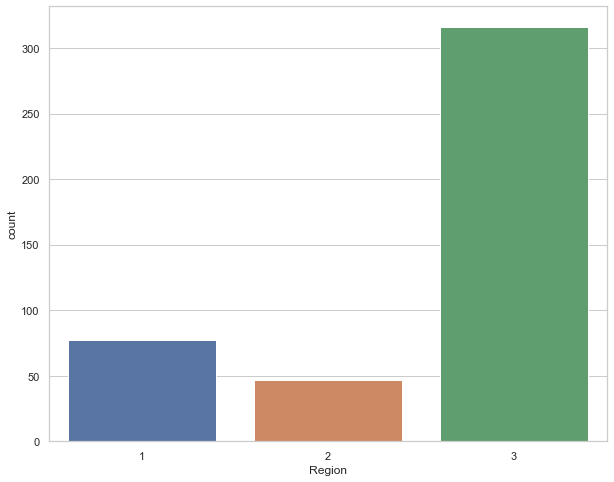

In [79]:
plt.figure(figsize = (10,8))
sns.countplot(x="Region", data=customer_df)

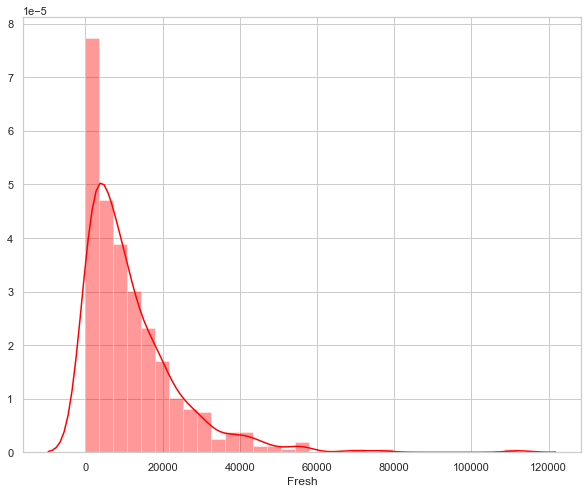

In [80]:
plt.figure(figsize = (10,8))
sns.distplot(customer_df['Fresh'],color="red")

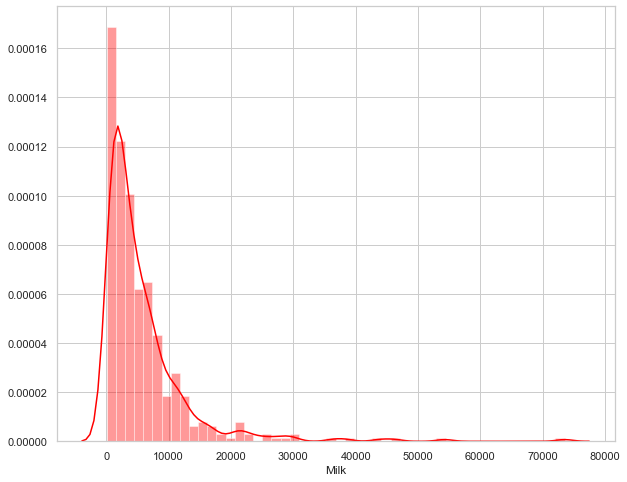

In [81]:
plt.figure(figsize = (10,8))
sns.distplot(customer_df['Milk'],color="red")

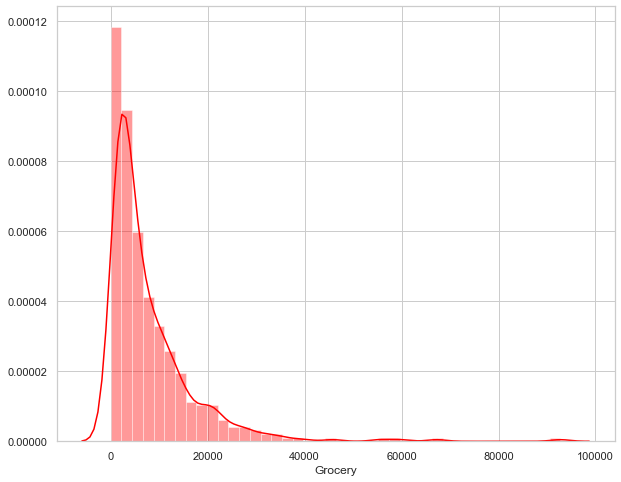

In [82]:
plt.figure(figsize = (10,8))
sns.distplot(customer_df['Grocery'],color="red")

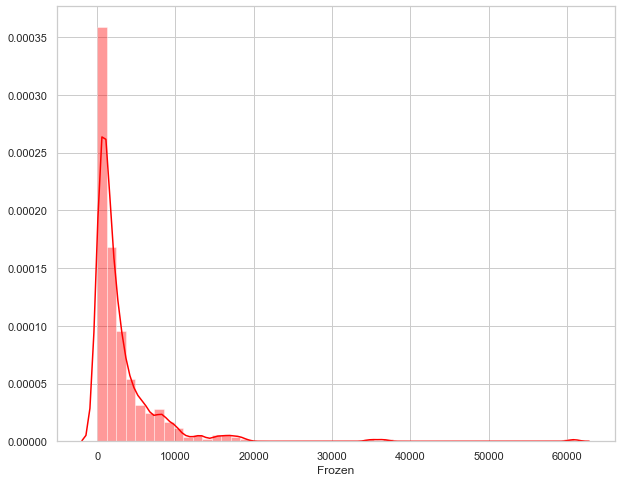

In [83]:
plt.figure(figsize = (10,8))
sns.distplot(customer_df['Frozen'],color="red")

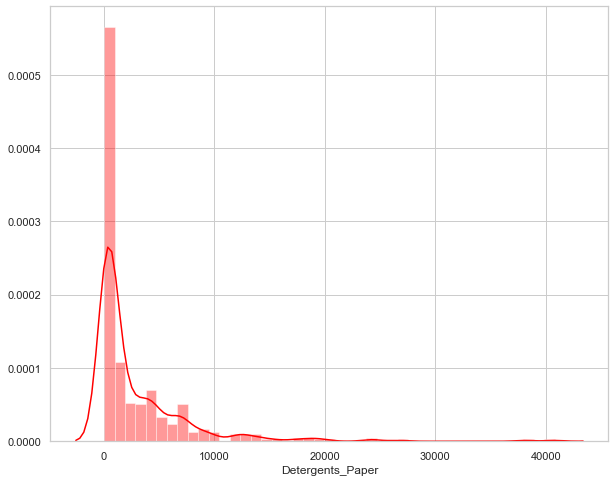

In [84]:
plt.figure(figsize = (10,8))
sns.distplot(customer_df['Detergents_Paper'],color="red")

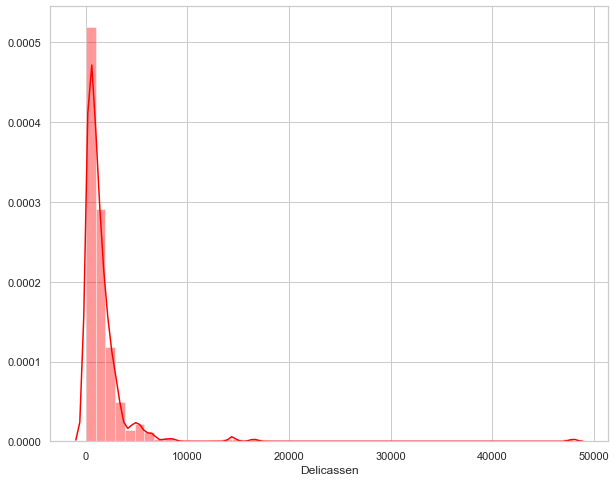

In [85]:
plt.figure(figsize = (10,8))
sns.distplot(customer_df['Delicassen'],color="red")

In [14]:
# If Channel and Region were necessary columns, then we would have had to do creating dummies step.
# Converting Channel and Region columns to categorical form

# customer_df['Channel'] = customer_df['Channel'].astype(object)
# customer_df['Region'] = customer_df['Region'].astype(object)

# Creating dummies for categorical variables:
# customer_df=pd.get_dummies(customer_df)

# Only n-1 dummies are required, so lets go ahead and drop the unnecessary dummy columns
# customer_df.drop(labels = ['Channel_2','Region_3'], axis = 1, inplace=True)

#customer_df.drop(labels = ['Channel_1','Region_1','Region_2'], axis = 1, inplace=True)

As our problem statement is about clustering the datapoints, the Channel and Region columns are not necessary. So we can go ahead and drop them.

In [15]:
# Removing Channel and Region columns
customer_df.drop(labels = ['Channel','Region'], axis = 1, inplace=True)

In [16]:
# Viewing the data after preprocessing
customer_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [17]:
#Feature Scaling
scaler = StandardScaler() 
customer_df_scaled=scaler.fit_transform(customer_df)
final_df = pd.DataFrame(customer_df_scaled)
final_df.columns = customer_df.columns
final_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [18]:
# Making a slice of the whole dataset to keep as a copy ( to be used in the next implementation)
final_df1=final_df[:]

In [19]:
# Fit KMeans and calculate SSE for each *k*
ss_error = {}
for k in range(1, 20):
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(final_df)
    ss_error[k] = k_means.inertia_

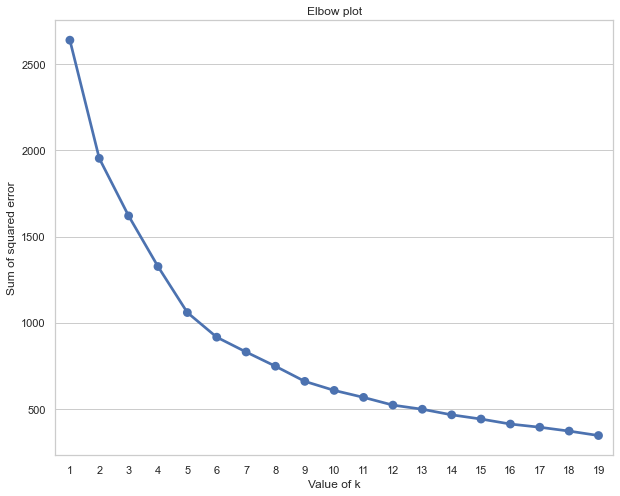

In [86]:
# Make elbow plot
plt.figure(figsize = (10,8))
plt.title('Elbow plot')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared error')
sns.pointplot(x=list(ss_error.keys()), y=list(ss_error.values()))

In [68]:
# Finding silhoutte score for each cluster
range_of_clusters=[4,5,6,7,8,9]
for n in range_of_clusters:
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(final_df)
    centers = clusterer.cluster_centers_
    score = silhouette_score(final_df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n, score))

For n_clusters = 4, silhouette score is 0.5232147966881928)
For n_clusters = 5, silhouette score is 0.5332643451186393)
For n_clusters = 6, silhouette score is 0.54223362090177)
For n_clusters = 7, silhouette score is 0.5053999591058104)
For n_clusters = 8, silhouette score is 0.5058458302345384)
For n_clusters = 9, silhouette score is 0.29930869374879887)


In [22]:
# KMeans implementation with number of clusters = 6
model = KMeans(n_clusters=6,max_iter=300,random_state=123)
model.fit(final_df)
final_df['clusters']=model.predict(final_df)
final_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,5
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,3
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,5
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


<Figure size 720x576 with 0 Axes>

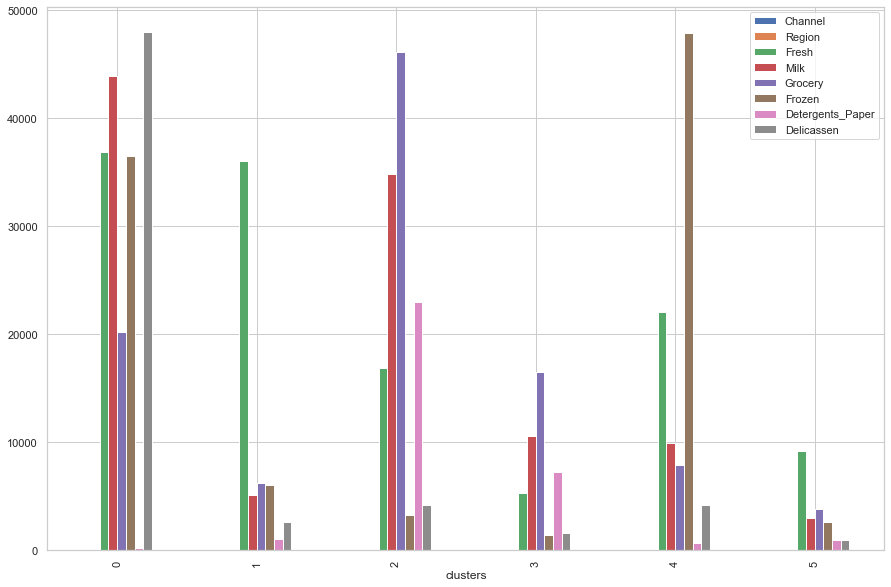

In [87]:
customer_df_cluster1 = customer_df
customer_df_cluster1['clusters']= final_df['clusters']
plt.figure(figsize = (10,8))
customer_df_cluster1.groupby('clusters').mean().plot(figsize=(15,10),kind='bar')

### K-Means implementation WITHOUT inbuilt functions:

In [23]:
final_df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [27]:
 class Kmeans:
    
    def __init__(self, n_clusters, max_iter=300,random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initialize_random_centroids(self, X):
        initial_centroids=[]
        np.random.seed(self.random_state)
        initial_centroids_indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        initial_centroids.append(X[initial_centroids_indices])
        return initial_centroids

    def nearest_centroid(self,X,centroids):
        distance = np.zeros((X.shape[0],self.n_clusters))
        nearest_cluster=[]
        for i in range(X.shape[0]):
            print("X",i,"=",X[i])
            for k in range(self.n_clusters):
                min_dist =np.sqrt(((X[i] - centroids[0][k])**2).sum())
                distance[:,k]= min_dist
            print("distance_from centroid ",0,"=",distance[k][0])
            print("distance_from centroid ",1,"=",distance[k][1])
            print("distance_from centroid ",2,"=",distance[k][2])
            print("distance_from centroid ",3,"=",distance[k][3])
            print("distance_from centroid ",4,"=",distance[k][4])
            print("distance_from centroid ",5,"=",distance[k][5])
            print("Nearest cluster= ",np.argmin(distance))
            nearest_cluster.append(np.argmin(distance))
        return nearest_cluster
    
    def recompute_centroids(self, X,labels):
        indices = [[i for i, l in enumerate(labels) if l == j]
                    for j in range(self.n_clusters)]
        X_by_cluster = [X[i] for i in indices]
        # update the clusters
        cluster_centers=[]
        cluster_centers.append([c.sum(axis=0) / len(c) for c in X_by_cluster])
        return cluster_centers
    
    def fit(self, X):
        self.centroids = self.initialize_random_centroids(X)
        for i in range(self.max_iter):
            print("\n\nIteration:",i)
            old_centroids = self.centroids
            self.labels = self.nearest_centroid(X,old_centroids)
            self.centroids = self.recompute_centroids(X,self.labels)
            print("\nOld centroids",old_centroids)
            print("New centroids",self.centroids)
            if np.allclose(old_centroids,self.centroids):
                break
        final_df1['clusters']=self.labels
        
        
def main():
    r= Kmeans(6)
    print(final_df1.values.shape[0])
    r.fit(final_df1.values)
        
if __name__ == "__main__":
    main()

440


Iteration: 0
X 0 = [ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906
  1.        ]
distance_from centroid  0 = 1.8509937363310385
distance_from centroid  1 = 1.7570473322408733
distance_from centroid  2 = 4.550296499289258
distance_from centroid  3 = 4.708977129933692
distance_from centroid  4 = 1.8330655197450954
distance_from centroid  5 = 4.648512041309616
Nearest cluster=  1
X 1 = [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105
  0.        ]
distance_from centroid  0 = 1.6073458500784106
distance_from centroid  1 = 2.0372446569700333
distance_from centroid  2 = 5.631503821590794
distance_from centroid  3 = 5.588195187568438
distance_from centroid  4 = 1.1718896275726094
distance_from centroid  5 = 5.736650932368655
Nearest cluster=  4
X 2 = [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255
  0.        ]
distance_from centroid  0 = 3.0296318819583696
distance_from centroid  1 = 3.2605120384350106
distance_f

In [89]:
final_df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,4
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,4
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,5


<Figure size 720x576 with 0 Axes>

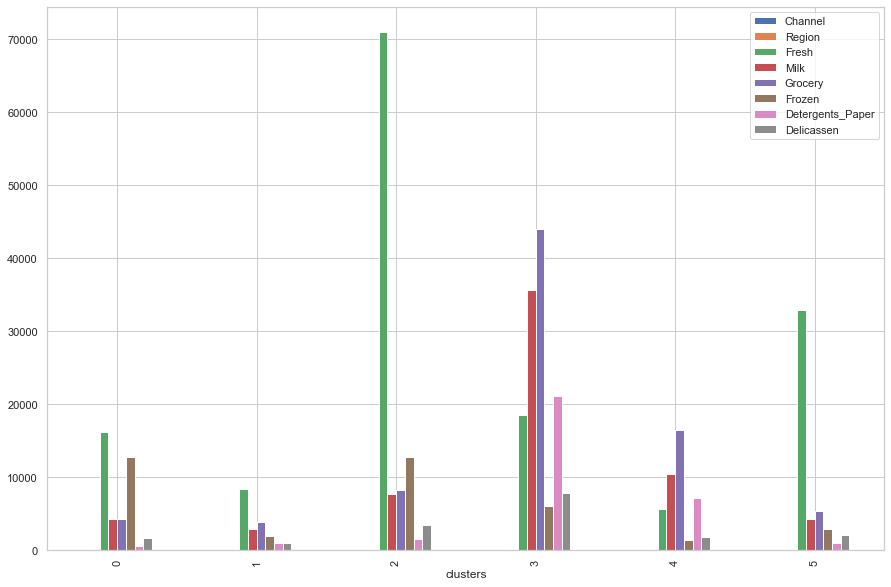

In [88]:
customer_df_cluster2 = customer_df
customer_df_cluster2['clusters']= final_df1['clusters']
plt.figure(figsize = (10,8))
customer_df_cluster2.groupby('clusters').mean().plot(figsize=(15,10),kind='bar')